Generating Data
===============

We first create 200 random two-dimensional data points.
The data points are sampled from a multinomial normal distribution.

You don't have to understand precisely how we do this. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import HTML
# This line tells the notebook to show plots inside of the notebook
%matplotlib inline

In [2]:
Cov = np.array([[2.9, -2.2], [-2.2, 6.5]])
X = np.random.multivariate_normal([1,2], Cov, size=200)

Let's have a look at the raw data first...

In [3]:
np.set_printoptions(4, suppress=True) # show only four decimals
print X[:10,:] # print the first 10 rows of X (from 0 to 9)

[[-1.5177  4.1708]
 [ 1.706  -0.0681]
 [ 3.8795  0.4936]
 [ 0.6875  1.515 ]
 [-1.1239  3.9207]
 [ 4.8386  2.9911]
 [ 0.9744  1.0272]
 [ 2.1283 -2.0099]
 [ 1.9076  1.413 ]
 [-0.05   -1.4051]]


Do you see a relationship between the two columns? Tricky, I'd say. However, since the data is two-dimensional, we can plot the data, which allows us to see the relationship.

(-3.6160788999918196,
 5.2553350218572321,
 -4.5209391593213315,
 9.2351675351302802)

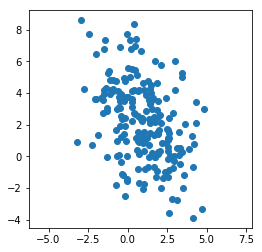

In [4]:
plt.figure(figsize=(4,4))
plt.scatter(X[:,0], X[:,1])
plt.axis('equal') # equal scaling on both axis;

We can also have a look at the actual covariance matrix: 

In probability theory and statistics, a covariance matrix (also known as dispersion matrix or variance–covariance matrix) is a matrix whose element in the i, j position is the covariance between the i th and j th elements of a random vector.

In [5]:
print np.cov(X,rowvar=False)

[[ 2.7218 -1.6956]
 [-1.6956  6.3284]]


Running PCA
===========

We would now like to analyze the directions in which the data varies most. For that, we 

1. place the point cloud in the center (0,0) and
2. rotate it, such that the direction with most variance is parallel to the x-axis.

Both steps can be done using PCA, which is conveniently available in sklearn.

We start by loading the PCA class from the sklearn package and creating an instance of the class:

In [6]:
from sklearn.decomposition import PCA
pca = PCA()

Now, `pca` is an object which has a function `pca.fit_transform(x)` which performs both steps from above to its argument `x`, and returns the centered and rotated version of `x`.

In [7]:
X_pca = pca.fit_transform(X)

In [8]:
pca.components_

array([[-0.3684,  0.9297],
       [-0.9297, -0.3684]])

In [9]:
pca.mean_

array([ 0.9573,  2.1939])

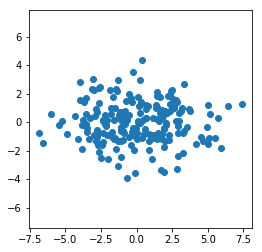

In [10]:
plt.figure(figsize=(4,4))
plt.scatter(X_pca[:,0], X_pca[:,1])
plt.axis('equal');

The covariances between different axes should be zero now. We can double-check by having a look at the non-diagonal entries of the covariance matrix:

In [11]:
print np.cov(X_pca, rowvar=False)

[[ 7.0004  0.    ]
 [ 0.      2.0498]]


High-Dimensional Data
=====================

Our small example above was very easy, since we could get insight into the data by simply plotting it. This approach will not work once you have more than 3 dimensions, let's say we have the same data, but it is represented in four dimensions:

In [12]:
np.random.seed(1)
X_HD = np.dot(X,np.random.uniform(0.2,3,(2,4))*(np.random.randint(0,2,(2,4))*2-1))

Lets look at the data again. First, the raw data:

In [13]:
print X_HD[:10]

[[ -0.4722  -1.4522  -2.7053  -3.2813]
 [ -2.2916   3.7507  -0.2926  -1.7058]
 [ -5.6074   8.8268  -1.1333  -4.6363]
 [ -1.8658   2.2188  -1.2308  -2.4883]
 [ -0.8581  -0.6938  -2.6037  -3.4014]
 [ -8.4449  12.0984  -3.1274  -8.5561]
 [ -1.9601   2.6311  -0.9363  -2.219 ]
 [ -1.683    3.7967   1.0238   0.1193]
 [ -3.4721   4.8768  -1.4016  -3.6461]
 [  0.9268  -0.7552   1.0239   1.6929]]


That one is more tricky. See anything? We can also try plot a few two-dimensional projections:

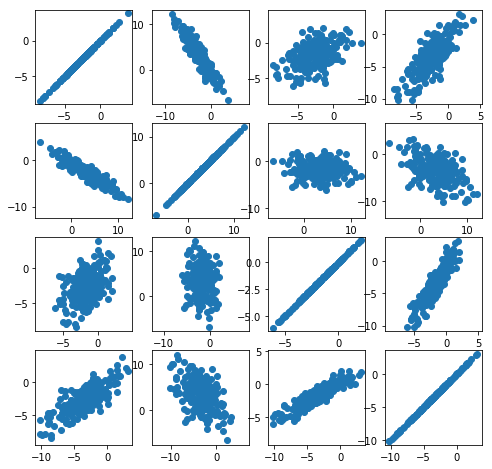

In [14]:
plt.figure(figsize=(8,8))
for i in xrange(4):
    for j in xrange(4):
        plt.subplot(4, 4, i * 4 + j + 1)
        plt.scatter(X_HD[:,i], X_HD[:,j])
        plt.axis('equal')
        plt.gca().set_aspect('equal')

It is not easy to see that this is still a two-dimensional dataset! 

However, if we now do PCA on it, you'll see that the last two dimensions do not matter at all:

In [15]:
X_HE = pca.fit_transform(X_HD)
print X_HE[:10,:]

[[  4.1426   3.083    0.       0.    ]
 [  0.9881  -2.2774   0.       0.    ]
 [ -5.7449  -3.1278   0.       0.    ]
 [  1.6562  -0.3867   0.       0.    ]
 [  3.3966   2.6445   0.       0.    ]
 [-11.7461  -1.685    0.      -0.    ]
 [  1.5245  -0.9531   0.      -0.    ]
 [  2.4421  -4.1001   0.      -0.    ]
 [ -1.5611  -1.2014   0.       0.    ]
 [  7.6172  -2.3041   0.       0.    ]]


Here it is easy to see, that the data is **still only two-dimensional**. Let's plot the two dimensions.

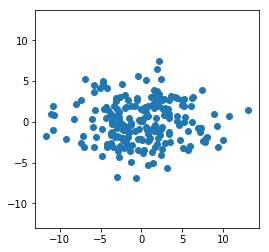

In [16]:
plt.figure(figsize=(4,4))
plt.scatter(X_HE[:,0], X_HE[:,1])
plt.axis('equal')
plt.gca().set_aspect('equal')

Why does the result look differently than the two-dimensional data from which we generated it?

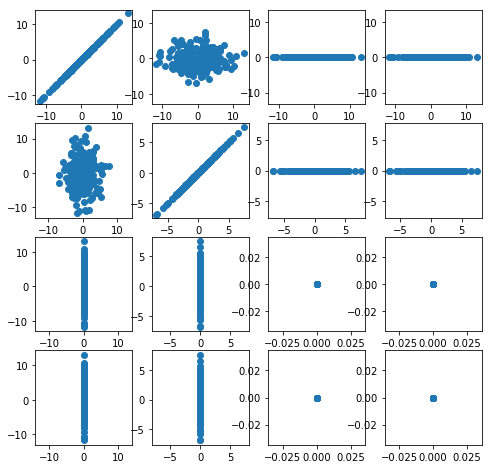

In [17]:
plt.figure(figsize=(8,8))
for i in xrange(4):
    for j in xrange(4):
        plt.subplot(4, 4, i * 4 + j + 1)
        plt.scatter(X_HE[:,i], X_HE[:,j])
        plt.gca().set_xlim(-40,40)
        plt.gca().set_ylim(-40,40)
        plt.axis('equal')
        plt.gca().set_aspect('equal')

Dimension Reduction with PCA
============================

We can see that there are actually only two dimensions in the dataset. 

Let's throw away even more data -- the second dimension -- and reconstruct the original data in `D`.

In [18]:
pca = PCA(1) # only keep one dimension!
X_E = pca.fit_transform(X_HD)
print X_E[:10,:]

[[  4.1426]
 [  0.9881]
 [ -5.7449]
 [  1.6562]
 [  3.3966]
 [-11.7461]
 [  1.5245]
 [  2.4421]
 [ -1.5611]
 [  7.6172]]


Now lets plot the reconstructed data and compare to the original data D. We plot the original data in red, and the reconstruction with only one dimension in blue:

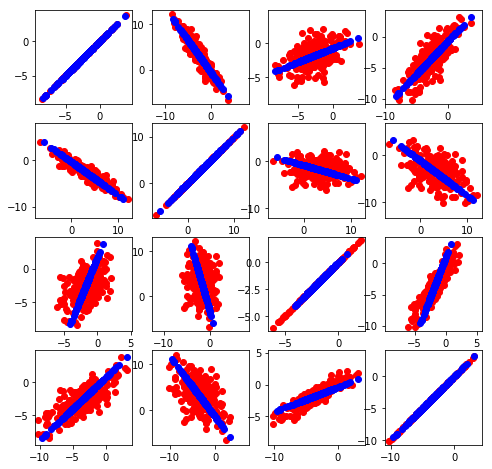

In [19]:
X_reconstructed = pca.inverse_transform(X_E)
plt.figure(figsize=(8,8))
for i in xrange(4):
    for j in xrange(4):
        plt.subplot(4, 4, i * 4 + j + 1)
        plt.scatter(X_HD[:,i], X_HD[:,j],c='r')
        plt.scatter(X_reconstructed[:,i], X_reconstructed[:,j],c='b')
        plt.axis('equal')

## PCA on Images

In this final example, we use the $k$-Means algorithm on the classical MNIST dataset.

The MNIST dataset contains images of hand-written digits. 

Let's first fetch the dataset from the internet (which may take a while, note the asterisk [*]):

In [20]:
from sklearn.datasets import fetch_mldata
from sklearn.cluster import KMeans
from sklearn.utils import shuffle
X_digits, _,_, Y_digits = fetch_mldata("MNIST Original").values() # fetch dataset from internet
X_digits, Y_digits = shuffle(X_digits,Y_digits) # shuffle dataset (which is ordered!)
X_digits = X_digits[-5000:]       # take only the last instances, to shorten runtime of PCA

Let's have a look at some of the instances in the dataset we just loaded:

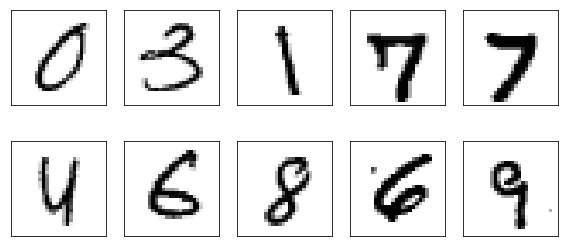

In [21]:
plt.rc("image", cmap="binary")
plt.figure(figsize=(8,4))
for i in xrange(10):
    plt.subplot(2,5,i+1)
    plt.imshow(X_digits[i].reshape(28,28))
    plt.xticks(())
    plt.yticks(())
plt.tight_layout()

**Warning**: This takes quite a few seconds, so be patient !

In [22]:
from sklearn.decomposition import PCA
pca = PCA()
X2_digits = pca.fit_transform(X_digits)

It does not make much sense to look at the transformed images, they will look like noise to us. 

Instead, let's have a look at the most important directions on which the dataset was projected:

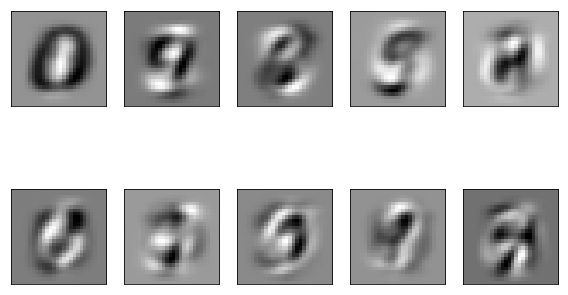

In [23]:
plt.figure(figsize=(8,6))
W = pca.components_

for i in xrange(10): # loop over all means
    plt.subplot(2,5,i+1)
    plt.imshow(W[i].reshape(28,28))
    plt.xticks(())
    plt.yticks(())
plt.tight_layout()

The later directions (here, from the 100-th on) mainly show noise, small variations between different, but very similar training instances:

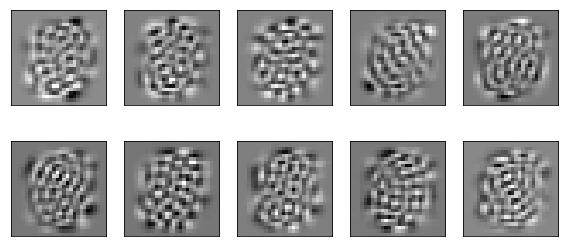

In [24]:
plt.figure(figsize=(8,4))
W = pca.components_

for i in xrange(10): # loop over all means
    plt.subplot(2,5,i+1)
    plt.imshow(W[100+i].reshape(28,28))
    plt.xticks(())
    plt.yticks(())
plt.tight_layout()

The number of "interesting" dimensions can be seen from the importance of the found directions. 

We can simply plot them:

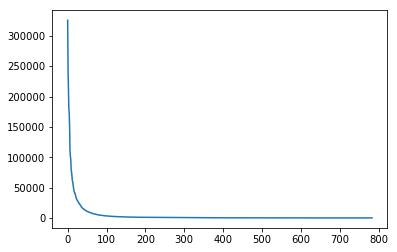

In [25]:
plt.plot(pca.explained_variance_);

We can see that the intrinsic dimensionality is not higher than maybe 100, even though the dataset has 784 dimensions!

Let's reconstruct the data again using only a handfull of the 784 dimensions:

In [35]:
from sklearn.decomposition import PCA
pca = PCA(6)
X2_few_digits = pca.fit_transform(X_digits)

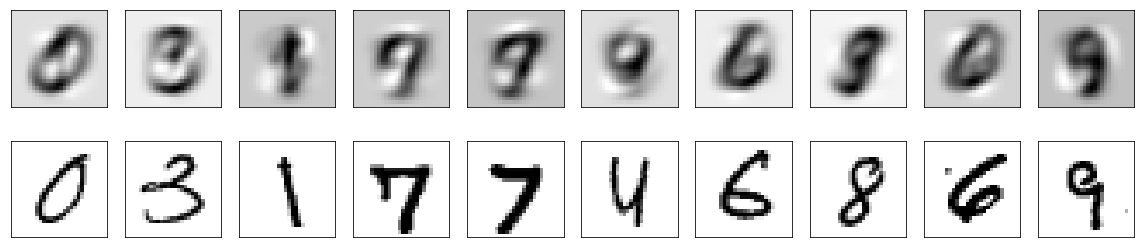

In [36]:
plt.figure(figsize=(16,4))
X_recons_digits = pca.inverse_transform(X2_few_digits)
for i in xrange(10):
    plt.subplot(2,10,i+1)
    plt.imshow(X_recons_digits[i].reshape(28,28))
    plt.xticks(())
    plt.yticks(())
for i in xrange(10):
    plt.subplot(2,10,11+i)
    plt.imshow(X_digits[i].reshape(28,28))
    plt.xticks(())
    plt.yticks(())
plt.tight_layout()

# Playing around more 

- What happens, when you multiply one of the data axis with a large (or small) number? 

  e.g. using X[:,0] *= 100

  Does the result stay the same? Why/why not?

-----

- Try to explore the iris dataset below using PCA. 

  What happens if you visualize the *last* components of PCA instead of the first ones?

-----

- Use PCA with 1, 2 or 3 axes and reconstruct the Iris data from each. How do the results change? Show plots!

In [28]:
from sklearn import datasets
_,data,target,_,_ = datasets.load_iris().values()